# 全台各縣市住宅、服務業及機關用電資料分析

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#drop:https://blog.csdn.net/songyunli1111/article/details/79306639

In [9]:
df = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=29935&md5_url=01410d8f98b8e14419aab3ad9802e371')

In [29]:
df

,日期,縣市,住宅部門售電量(度),住宅部門用電佔比(%),服務業部門售電量(度),服務業部門用電佔比(%),機關用電售電量(度),機關用電用電佔比(%),農林漁牧售電量(度),農林漁牧用電佔比(%),合計售電量(度),縣市用電佔比(%)
0,2019年08月,新北市,900768099,0.585700,573248860,0.372800,60958857,0.039600,2880027,0.001900,1537855843,16.198398
1,2019年08月,台北市,564756678,0.374600,803033446,0.532700,138988250,0.092200,764614,0.000500,1507542988,15.879109
2,2019年08月,桃園市,525710597,0.542700,384374877,0.396800,53221868,0.054900,5430495,0.005600,968737837,10.203818
3,2019年08月,台中市,588014556,0.501700,504743366,0.430600,62709375,0.053500,16641684,0.014200,1172108981,12.345948
4,2019年08月,台南市,381068991,0.537200,250312281,0.352900,40301470,0.056800,37689280,0.053100,709372022,7.471890
5,2019年08月,高雄市,482007475,0.487900,407068415,0.412100,77203031,0.078200,21581381,0.021800,987860302,10.405237
6,2019年08月,宜蘭縣,95703951,0.533700,63588583,0.354600,12526272,0.069900,7491284,0.041800,179310090,1.888692
7,2019年08月,新竹縣,133765678,0.580600,82535642,0.358200,12096767,0.052500,1988051,0.008600,230386138,2.426682
8,2019年08月,苗栗縣,99984064,0.587400,54741560,0.321600,12258812,0.072000,3244572,0.019100,170229008,1.793040
9,2019年08月,彰化縣,234137936,0.529600,135570300,0.306600,23425245,0.053000,48992713,0.110800,442126194,4.656962


### 將"縣市=合計"刪除

In [30]:
filtter = (df['縣市'] != "合計")
df1 = df[filtter]
df1

,日期,縣市,住宅部門售電量(度),住宅部門用電佔比(%),服務業部門售電量(度),服務業部門用電佔比(%),機關用電售電量(度),機關用電用電佔比(%),農林漁牧售電量(度),農林漁牧用電佔比(%),合計售電量(度),縣市用電佔比(%)
0,2019年08月,新北市,900768099,0.585700,573248860,0.372800,60958857,0.039600,2880027,0.001900,1537855843,16.198398
1,2019年08月,台北市,564756678,0.374600,803033446,0.532700,138988250,0.092200,764614,0.000500,1507542988,15.879109
2,2019年08月,桃園市,525710597,0.542700,384374877,0.396800,53221868,0.054900,5430495,0.005600,968737837,10.203818
3,2019年08月,台中市,588014556,0.501700,504743366,0.430600,62709375,0.053500,16641684,0.014200,1172108981,12.345948
4,2019年08月,台南市,381068991,0.537200,250312281,0.352900,40301470,0.056800,37689280,0.053100,709372022,7.471890
5,2019年08月,高雄市,482007475,0.487900,407068415,0.412100,77203031,0.078200,21581381,0.021800,987860302,10.405237
6,2019年08月,宜蘭縣,95703951,0.533700,63588583,0.354600,12526272,0.069900,7491284,0.041800,179310090,1.888692
7,2019年08月,新竹縣,133765678,0.580600,82535642,0.358200,12096767,0.052500,1988051,0.008600,230386138,2.426682
8,2019年08月,苗栗縣,99984064,0.587400,54741560,0.321600,12258812,0.072000,3244572,0.019100,170229008,1.793040
9,2019年08月,彰化縣,234137936,0.529600,135570300,0.306600,23425245,0.053000,48992713,0.110800,442126194,4.656962


### 篩選出2019年的資料

In [31]:
filtter2 = (df['日期'].str.contains("2019年"))
df2 = df[filtter2]
df2

,日期,縣市,住宅部門售電量(度),住宅部門用電佔比(%),服務業部門售電量(度),服務業部門用電佔比(%),機關用電售電量(度),機關用電用電佔比(%),農林漁牧售電量(度),農林漁牧用電佔比(%),合計售電量(度),縣市用電佔比(%)
0,2019年08月,新北市,900768099,0.5857,573248860,0.3728,60958857,0.0396,2880027,0.0019,1537855843,16.198398
1,2019年08月,台北市,564756678,0.3746,803033446,0.5327,138988250,0.0922,764614,0.0005,1507542988,15.879109
2,2019年08月,桃園市,525710597,0.5427,384374877,0.3968,53221868,0.0549,5430495,0.0056,968737837,10.203818
3,2019年08月,台中市,588014556,0.5017,504743366,0.4306,62709375,0.0535,16641684,0.0142,1172108981,12.345948
4,2019年08月,台南市,381068991,0.5372,250312281,0.3529,40301470,0.0568,37689280,0.0531,709372022,7.471890
5,2019年08月,高雄市,482007475,0.4879,407068415,0.4121,77203031,0.0782,21581381,0.0218,987860302,10.405237
6,2019年08月,宜蘭縣,95703951,0.5337,63588583,0.3546,12526272,0.0699,7491284,0.0418,179310090,1.888692
7,2019年08月,新竹縣,133765678,0.5806,82535642,0.3582,12096767,0.0525,1988051,0.0086,230386138,2.426682
8,2019年08月,苗栗縣,99984064,0.5874,54741560,0.3216,12258812,0.0720,3244572,0.0191,170229008,1.793040
9,2019年08月,彰化縣,234137936,0.5296,135570300,0.3066,23425245,0.0530,48992713,0.1108,442126194,4.656962


### 將同縣市的資料合併

In [32]:
df3 = df2.groupby(by='縣市').sum()
df3

,住宅部門售電量(度),住宅部門用電佔比(%),服務業部門售電量(度),服務業部門用電佔比(%),機關用電售電量(度),機關用電用電佔比(%),農林漁牧售電量(度),農林漁牧用電佔比(%),合計售電量(度),縣市用電佔比(%)
縣市,,,,,,,,,,
南投縣,544239346,4.1553,348838372,2.6701,84930072,0.6541,67632301,0.5201,1045640091,13.872999
台中市,3570313950,3.7416,3460604128,3.6403,473019932,0.5003,111636662,0.1175,7615574672,100.452122
台北市,3202733828,2.6977,5278416438,4.4670,978611075,0.8312,4928537,0.0040,9464689878,124.378188
台南市,2370668801,4.0952,1692717997,2.9347,318434975,0.5577,238549571,0.4124,4620371344,60.914292
台東縣,247834330,3.8785,192085929,3.0065,54104478,0.8536,16577165,0.2613,510601902,6.739914
合計,29036571130,3.8193,25109009905,3.3091,4594333115,0.6099,1964167222,0.2598,60704081372,800.000000
嘉義市,322297907,3.7586,311604409,3.6412,46269259,0.5447,4737610,0.0557,684909185,9.025281
嘉義縣,554773767,4.1392,249725410,1.8599,95643434,0.7162,172660529,1.2847,1072803140,14.194383
基隆市,440068751,4.5859,270000036,2.8252,55859610,0.5881,102441,0.0012,766030838,10.102921


# 將占比的行刪掉

In [36]:
df4 = df3.drop(['住宅部門用電佔比(%)','服務業部門用電佔比(%)','機關用電用電佔比(%)','農林漁牧用電佔比(%)','縣市用電佔比(%)'], axis = 1)
df4

,住宅部門售電量(度),服務業部門售電量(度),機關用電售電量(度),農林漁牧售電量(度),合計售電量(度)
縣市,,,,,
南投縣,544239346,348838372,84930072,67632301,1045640091
台中市,3570313950,3460604128,473019932,111636662,7615574672
台北市,3202733828,5278416438,978611075,4928537,9464689878
台南市,2370668801,1692717997,318434975,238549571,4620371344
台東縣,247834330,192085929,54104478,16577165,510601902
合計,29036571130,25109009905,4594333115,1964167222,60704081372
嘉義市,322297907,311604409,46269259,4737610,684909185
嘉義縣,554773767,249725410,95643434,172660529,1072803140
基隆市,440068751,270000036,55859610,102441,766030838


### Result1:依照總用電量高低排序

In [37]:
df4.sort_values(by="合計售電量(度)",ascending = False)

,住宅部門售電量(度),服務業部門售電量(度),機關用電售電量(度),農林漁牧售電量(度),合計售電量(度)
縣市,,,,,
合計,29036571130,25109009905,4594333115,1964167222,60704081372
台北市,3202733828,5278416438,978611075,4928537,9464689878
新北市,5073449526,3808903323,438351731,18866413,9339570993
台中市,3570313950,3460604128,473019932,111636662,7615574672
高雄市,3449900247,2868328539,616222519,160760876,7095212181
桃園市,2860895318,2426811871,392743878,30044816,5710495883
台南市,2370668801,1692717997,318434975,238549571,4620371344
彰化縣,1457106898,878781859,174755146,295459544,2806103447
屏東縣,1018020989,540835151,149291265,487803029,2195950434


### 篩出台北市的所有資料

In [38]:
filtter7 = (df['縣市'].str.contains("台北市"))
df7 = df[filtter7]
df7

,日期,縣市,住宅部門售電量(度),住宅部門用電佔比(%),服務業部門售電量(度),服務業部門用電佔比(%),機關用電售電量(度),機關用電用電佔比(%),農林漁牧售電量(度),農林漁牧用電佔比(%),合計售電量(度),縣市用電佔比(%)
1,2019年08月,台北市,564756678,0.374600,803033446,0.532700,138988250,0.092200,764614,0.000500,1507542988,15.879109
24,2019年07月,台北市,490131430,0.342400,798954901,0.558200,141516113,0.098900,731381,0.000500,1431333825,16.165376
47,2019年06月,台北市,401785697,0.324100,701272928,0.565700,135996298,0.109700,673614,0.000500,1239728537,15.529350
70,2019年05月,台北市,377632685,0.314000,692711342,0.576100,131498715,0.109400,648946,0.000500,1202491688,15.769317
93,2019年04月,台北市,331125823,0.318300,589279943,0.566400,119377838,0.114700,547769,0.000500,1040331373,15.321185
116,2019年03月,台北市,349226853,0.335800,579579651,0.557300,110627737,0.106400,548362,0.000500,1039982603,15.387071
139,2019年02月,台北市,334772687,0.356600,512888832,0.546400,90544757,0.096500,466348,0.000500,938672624,14.718750
162,2019年01月,台北市,353301975,0.331900,600695395,0.564200,110061367,0.103400,547503,0.000500,1064606240,15.608029
185,2018年12月,台北市,352557853,0.326600,608178524,0.563300,117388745,0.108700,1494096,0.001400,1079619218,15.144010
208,2018年11月,台北市,432908548,0.352900,669675046,0.545900,122590340,0.099900,1513364,0.001200,1226687298,15.372659


### Result2:台北市2012-2019每月合計用電量之趨勢圖

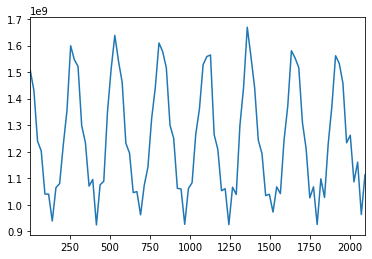

In [42]:
df7['合計售電量(度)'].plot()